# Exercises in neural network and deep learning II

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

## Exercise 1

In this exercise, we will use the titanic dataset to build a neural network classifier for the target variable `Survived`. In this exercise, all the necessary steps are broken down to small individual task you should do. So, do the following tasks:

1. Load in the titanic dataset (on Moodle as "titanic_survival_data.csv"), select the columns "Pclass", "Sex", "Age", and "Fare" for the feature set X and "Survived" for the target variable y.
2. For the columns "Age" and "Fare", replace the missing values with the column's mean.
3. Turn the variables "Pclass" and "Sex" into dummy variables.
4. Do a train-test split of the data
5. Scale the X training dataset, using the standard scaler.
6. Transform the X test dataset with the same scaler fitted in task 5.
7. Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.
8. Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.
9. Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.
10. Plot the training and validation loss and decide on a best number of epochs.
11. Rebuild and retrain the model for the number of epochs decided in task 10 above.
12. Evaluate the model on the test dataset to get the test accuracy.
13. Calculate precision, recall, and f1-score for the model on the test dataset.
14. Plot the Confusion matrix for the test dataset.

### Task 1.1 Load in the data

In [3]:
titanic = pd.read_csv('data\\titanic_survival_data.csv')
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']] 
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.250
1,1,female,38.0,712.833
2,3,female,26.0,7.925
3,1,female,35.0,53.100
4,3,male,35.0,8.050
...,...,...,...,...
886,2,male,27.0,13.000
887,1,female,19.0,30.000
888,3,female,NaN,23.450
889,1,male,26.0,30.000


In [4]:
y = titanic[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### Task 1.2 Preprocessing
For the columns "Age" and "Fare", replace the missing values with the column's mean.


In [5]:
age_means = X['Age'].mean()
fare_means = X['Fare'].mean()

X[['Age']] = X[['Age']].fillna(age_means)
X[['Fare']] = X[['Fare']].fillna(fare_means)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_18704\557247777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age']] = X[['Age']].fillna(age_means)
C:\Users\Hassan\AppData\Local\Temp\ipykernel_18704\557247777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Fare']] = X[['Fare']].fillna(fare_means)


### Task 1.3 One-hot encoding
Turn the variables "Pclass" and "Sex" into dummy variables.


In [6]:
X = pd.get_dummies(X, columns=['Pclass', 'Sex'], drop_first=True)
X

,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,22.000000,7.250,False,True,True
1,38.000000,712.833,False,False,False
2,26.000000,7.925,False,True,False
3,35.000000,53.100,False,False,False
4,35.000000,8.050,False,True,True
...,...,...,...,...,...
886,27.000000,13.000,True,False,True
887,19.000000,30.000,False,False,False
888,29.679272,23.450,False,True,False
889,26.000000,30.000,False,False,True


### Task 1.4 Test-train split
Do a train-test split of the data


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)



### Task 1.5 Scale X_train
Scale the X training dataset, using the standard scaler.

In [8]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) 


### Task 1.6 Transform X_test
Transform the X test dataset with the same scaler fitted in task 5.

In [9]:
X_test_scaled = scaler.transform(X_test)

### Task 1.7 Transform into arrays
Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.


In [10]:
X_train_array = X_train_scaled
X_test_array = X_test_scaled
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()



### Task 1.8 Create NN model
Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.


In [11]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy", "precision", "f1_score", "recall"])

### Task 1.9 Train NN model
Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.


In [12]:

partial_history = model.fit(X_train,
                     y_train,
                     epochs = 50,
                     batch_size=64,
                     validation_split=0.2)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3774 - f1_score: 0.5478 - loss: 6.3166 - precision: 0.3774 - recall: 1.0000 - val_accuracy: 0.4126 - val_f1_score: 0.5842 - val_loss: 3.8609 - val_precision: 0.4126 - val_recall: 1.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3694 - f1_score: 0.5401 - loss: 3.0322 - precision: 0.3697 - recall: 0.9980 - val_accuracy: 0.3986 - val_f1_score: 0.5842 - val_loss: 1.4000 - val_precision: 0.4043 - val_recall: 0.9661
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3893 - f1_score: 0.5751 - loss: 1.1974 - precision: 0.3856 - recall: 0.8676 - val_accuracy: 0.4336 - val_f1_score: 0.5842 - val_loss: 0.9041 - val_precision: 0.3922 - val_recall: 0.6780
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4383 - f1_score: 0.5700 - loss: 0.8796 - precision: 0.3775 - recall: 0.6271 - val_accuracy: 0.4336 - val_f1_score: 0.5842 - val_loss: 0.7724 - val_precision: 0.3333 - val_recall: 0.3729
Epoch 5

### Task 1.10 Plotting
Plot the training and validation loss and decide on a best number of epochs.


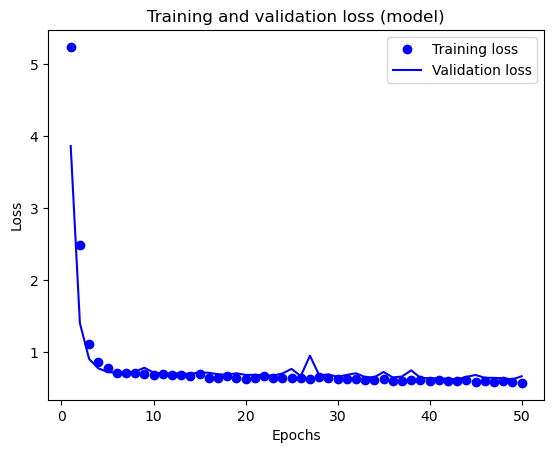

In [13]:
import matplotlib.pyplot as plt
history_dict = partial_history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Task 1.11 Retrain with 8 epochs 
Rebuild and retrain the model for the number of epochs decided in task 10 above.


In [14]:

history_full = model.fit(X_train,
                     y_train,
                     epochs = 8,
                     batch_size=64)


Epoch 1/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - f1_score: 0.5730 - loss: 0.6097 - precision: 0.6787 - recall: 0.3504 
Epoch 2/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - f1_score: 0.5647 - loss: 0.5852 - precision: 0.6857 - recall: 0.4445 
Epoch 3/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - f1_score: 0.5344 - loss: 0.6412 - precision: 0.7460 - recall: 0.2757 
Epoch 4/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6921 - f1_score: 0.5663 - loss: 0.6141 - precision: 0.7399 - recall: 0.3425 
Epoch 5/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - f1_score: 0.5621 - loss: 0.5947 - precision: 0.6800 - recall: 0.3646 
Epoch 6/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - f1_score: 0.5583 - loss: 0.6109 - precision: 0.6874 - recall: 0.4498 
Epoch 7/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - f1_score: 0.5514 - loss: 0.5536 - precision: 0.7289 - recall: 0.4474 
Epoch 8/8
12/12 ━━━━

### Task 1.12 + 1.13 Evaluation 
Evaluate the model on the test dataset to get the test accuracy.


In [15]:
results = model.evaluate(X_test, y_test)
print(f'{results}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7632 - f1_score: 0.4679 - loss: 0.5304 - precision: 0.6375 - recall: 0.5251 
[0.562795102596283, 0.748603343963623, 0.6808510422706604, 0.5145227909088135, 0.5161290168762207]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


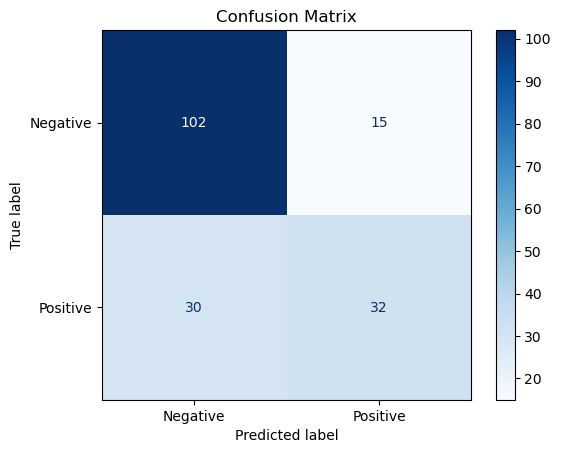

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)  #threshold for the confidence between 0-1

cm = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
matrix.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

## Exercise 3

Based on the **AmesHousing dataset** from the class on regression, make a deep learning regression model to predict the sales price variable.